In [2]:
# regular expression operations
import re
# string operation
import string
# shuffle the list
from random import shuffle

# linear algebra
import numpy as np
# data processing
import pandas as pd

# NLP library
import nltk
# module for stop words that come with NLTK
from nltk.corpus import stopwords
# module for stemming
from nltk.stem import PorterStemmer
# module for tokenizing strings
from nltk.tokenize import TweetTokenizer

# scikit model selection
from sklearn.model_selection import train_test_split

# smart progressor meter
from tqdm import tqdm
import seaborn as sns
import json


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.listdir('drive/MyDrive/Zhalgas Zhiyenbekov/KBTU/NLP/Seminars/Text_Classification/nfact_data.json')

['Text_Classification_LR.ipynb',
 'LICENSE',
 'annotations_summaries.csv',
 'README.md',
 '.DS_Store',
 '.ipynb_checkpoints',
 'nfact_data.json',
 'fact_data.json']

In [3]:
import pandas as pd

# Path to the CSV file
file_path = 'annotations_summaries.csv'

# Read the CSV file into a pandas DataFrame
try:
    data = pd.read_csv(file_path)
    # Display the first few rows as a table
    print("Data loaded successfully!")
    from IPython.display import display  # Ensure we can display as a table in Jupyter/Kaggle
    display(data.head())  # Displays the first 5 rows neatly as a table
except FileNotFoundError:
    print(f"The file at {file_path} was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Data loaded successfully!


,bbcid,system,summary,is_factual,worker_id
0,29911712,BERTS2S,more than 50 pupils at a bristol academy have ...,no,wid_0
1,29911712,BERTS2S,more than 50 pupils at a bristol academy have ...,no,wid_1
2,29911712,BERTS2S,more than 50 pupils at a bristol academy have ...,no,wid_2
3,38505171,BERTS2S,the wife of a british-iranian woman jailed in ...,no,wid_0
4,38505171,BERTS2S,the wife of a british-iranian woman jailed in ...,no,wid_1


In [4]:
import pandas as pd
import json

# Assuming 'data' is the DataFrame from the previous step
# data = pd.read_csv('your_file_path.csv')

# Let's classify the data into factual and non-factual
factual_data = data[data['is_factual'] == 'yes']['summary'].tolist()
non_factual_data = data[data['is_factual'] == 'no']['summary'].tolist()

# Define the paths for saving the separate JSON files
factual_output_path = 'fact_data.json'
non_factual_output_path = 'nfact_data.json'

# Write the factual data to a JSON file
with open(factual_output_path, 'w') as factual_json_file:
    json.dump(factual_data, factual_json_file, indent=4)

# Write the non-factual data to a JSON file
with open(non_factual_output_path, 'w') as non_factual_json_file:
    json.dump(non_factual_data, non_factual_json_file, indent=4)

print(f"Factual data saved to {factual_output_path}")
print(f"Non-factual data saved to {non_factual_output_path}")

Factual data saved to fact_data.json
Non-factual data saved to nfact_data.json


In [5]:

# Path to your JSON files
factual_data_path = 'fact_data.json'
non_factual_data_path = 'nfact_data.json'

# Read the factual and non-factual data from JSON
with open(factual_data_path, 'r') as f:
    factual_data_path = json.load(f)

with open(non_factual_data_path, 'r') as f:
    non_factual_data_path = json.load(f)

# Check the length of the data
print(f"Factual data count: {len(factual_data_path)}")
print(f"Non-factual data count: {len(non_factual_data_path)}")

Factual data count: 582
Non-factual data count: 4982


In [6]:
# Display the first 5 factual and nonfactual samples
print("\nFactual Samples:")
for i, sentence in enumerate(factual_data_path[:5], 1):
    print(f"{i}: {sentence}")

print("\nNon Factual Samples:")
for i, sentence in enumerate(non_factual_data_path[:5], 1):
    print(f"{i}: {sentence}")


Factual Samples:
1: aberdeen have appointed arbroath boss paul sheerin as their new manager.
2: aberdeen have appointed arbroath boss paul sheerin as their new manager.
3: a woman was assaulted and assaulted in a mcdonald's restaurant in kent, police have said.
4: a woman was assaulted and assaulted in a mcdonald's restaurant in kent, police have said.
5: a woman was assaulted and assaulted in a mcdonald's restaurant in kent, police have said.

Non Factual Samples:
1: more than 50 pupils at a bristol academy have been sent home from school because of a lack of uniform.
2: more than 50 pupils at a bristol academy have been sent home from school because of a lack of uniform.
3: more than 50 pupils at a bristol academy have been sent home from school because of a lack of uniform.
4: the wife of a british-iranian woman jailed in iran has called on the government to appeal against her conviction.
5: the wife of a british-iranian woman jailed in iran has called on the government to appeal a

In [7]:
# Let's have a look at the data
no_of_facts = 3
print("Example of Factual Sentences:")
print('\n'.join(factual_data_path[:no_of_facts]))
print("\nExample of Non factual sentences:")
print('\n'.join(non_factual_data_path[:no_of_facts]))

Example of Factual Sentences:
aberdeen have appointed arbroath boss paul sheerin as their new manager.
aberdeen have appointed arbroath boss paul sheerin as their new manager.
a woman was assaulted and assaulted in a mcdonald's restaurant in kent, police have said.

Example of Non factual sentences:
more than 50 pupils at a bristol academy have been sent home from school because of a lack of uniform.
more than 50 pupils at a bristol academy have been sent home from school because of a lack of uniform.
more than 50 pupils at a bristol academy have been sent home from school because of a lack of uniform.


In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# helper class for doing preprocessing
class Sentence_Preprocess():

    def __init__(self):
        # instantiate tokenizer class
        self.tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True)
        # get the english stopwords
        self.stopwords_en = stopwords.words('english')
        # get the english punctuation
        self.punctuation_en = string.punctuation
        # Instantiate stemmer object
        self.stemmer = PorterStemmer()

    def __remove_unwanted_characters__(self, sentence):
        translator = str.maketrans("", "", self.punctuation_en)
        # remove resentence style text "RT"

        ## return removed text
        return sentence.translate(translator)

    def __tokenize_sentence__(self, sentence):
        # tokenize sentences
        return self.tokenizer.tokenize(sentence)

    def __remove_stopwords__(self, sentence_tokens):
        # remove stopwords
        sentences_clean = [
            token for token in sentence_tokens 
            if token not in self.stopwords_en
        ]
        return sentences_clean

    def __text_stemming__(self,sentence_tokens):
        # store the stemmed word
        sentences_stem = [
            self.stemmer.stem(token) for token in sentence_tokens
        ]
        return sentences_stem

    def preprocess(self, sentences):
        sentences_processed = []
        for _, sentence in tqdm(enumerate(sentences)):
            # apply removing unwated characters and remove style of resentence, URL
            sentence = self.__remove_unwanted_characters__(sentence)
            # apply nltk tokenizer
            sentence_tokens = self.__tokenize_sentence__(sentence)
            # apply stop words removal
            sentence_clean = self.__remove_stopwords__(sentence_tokens)
            # apply stemmer
            sentence_stems = self.__text_stemming__(sentence_clean)
            sentences_processed.extend([sentence_stems])
        return sentences_processed

In [11]:
# initilize the text preprocessor class object
sentence_text_processor = Sentence_Preprocess()

# process the factual and nonfactual sentences
processed_factual_data_path = sentence_text_processor.preprocess(factual_data_path)
processed_non_factual_data_path = sentence_text_processor.preprocess(non_factual_data_path)

582it [00:00, 1973.46it/s]
4982it [00:02, 1845.29it/s]


In [12]:
factual_data_path[:no_of_facts], processed_factual_data_path[:no_of_facts]

(['aberdeen have appointed arbroath boss paul sheerin as their new manager.',
  'aberdeen have appointed arbroath boss paul sheerin as their new manager.',
  "a woman was assaulted and assaulted in a mcdonald's restaurant in kent, police have said."],
 [['aberdeen',
   'appoint',
   'arbroath',
   'boss',
   'paul',
   'sheerin',
   'new',
   'manag'],
  ['aberdeen',
   'appoint',
   'arbroath',
   'boss',
   'paul',
   'sheerin',
   'new',
   'manag'],
  ['woman',
   'assault',
   'assault',
   'mcdonald',
   'restaur',
   'kent',
   'polic',
   'said']])

In [13]:
# BOW frequency represent the (word, y) and frequency of y class
def build_bow_dict(sentences, labels):
    freq = {}
    ## create zip of sentences and labels
    for sentence, label in list(zip(sentences, labels)):
        for word in sentence:
            freq[(word, label)] = freq.get((word, label), 0) + 1

    return freq

In [14]:
# create labels of the sentences
# 1 for factual labels and 0 for nonfactual labels
labels = [1 for i in range(len(processed_factual_data_path))]
labels.extend([0 for i in range(len(processed_non_factual_data_path))])

# combine the factual and nonfactual sentences
sentence_processed_corpus = processed_factual_data_path + processed_non_factual_data_path

# build Bog of words frequency
bow_word_frequency = build_bow_dict(sentence_processed_corpus, labels)

In [15]:
# extract feature for sentence
def extract_features(processed_sentence, bow_word_frequency):
    # feature array
    features = np.zeros((1,3))
    # bias term added in the 0th index
    features[0,0] = 1

    # iterate processed_sentence
    for word in processed_sentence:
        # get the factual frequency of the word
        features[0,1] = bow_word_frequency.get((word, 1), 0)
        # get the nonfactual frequency of the word
        features[0,2] = bow_word_frequency.get((word, 0), 0)

    return features

In [16]:
# shuffle the factual and nonfactual sentences
shuffle(processed_factual_data_path)
shuffle(processed_non_factual_data_path)

# create factual and nonfactual labels
factual_sentence_label = [1 for i in processed_factual_data_path]
nonfactual_sentence_label = [0 for i in processed_non_factual_data_path]

# create dataframe
sentence_df = pd.DataFrame(list(zip(sentence_processed_corpus, factual_sentence_label+nonfactual_sentence_label)), columns=["processed_sentence", "label"])

In [17]:
# train and test split
train_X_sentence, test_X_sentence, train_Y, test_Y = train_test_split(sentence_df["processed_sentence"], sentence_df["label"], test_size = 0.20, stratify=sentence_df["label"])
print(f"train_X_sentence {train_X_sentence.shape}, test_X_sentence {test_X_sentence.shape}, train_Y {train_Y.shape}, test_Y {test_Y.shape}")

train_X_sentence (4451,), test_X_sentence (1113,), train_Y (4451,), test_Y (1113,)


In [18]:
import pandas as pd

# Combine test_X_sentence and test_Y for display
test_split_display = pd.DataFrame({
    "Processed Sentences": test_X_sentence.values,
    "Label": test_Y.values
})

# Display the test split
print("Test Split:")
print(test_split_display.to_string())

Test Split:
                                                                                                                                               Processed Sentences  Label
0                              [nation, leagu, side, bromley, sign, midfield, john, macdonald, twoyear, deal, follow, releas, nation, leagu, rival, lincoln, citi]      0
1                          [australian, prime, minist, malcolm, turnbul, appoint, australian, prime, minist, australian, prime, minist, malcolm, turnbul, announc]      0
2                                                                   [first, minist, carwyn, jone, said, disappoint, uk, govern, decis, grant, devolv, power, wale]      0
3                                                                                      [collect, photograph, around, world, gone, display, liverpool, first, time]      0
4                                                    [polic, investig, murder, two, british, tourist, thai, island, koh, tao, return, thai

In [33]:
# Display the train_X_sentence and test_X_sentence datasets
print("Train X Facts:")
for i, sentence in enumerate(train_X_sentence):
    print(f"{i}: {sentence}")

print("\nTest X Facta:")
for i, sentence in enumerate(test_X_sentence):
    print(f"{i}: {sentence}")

Train X Facts:
0: ['studi', 'carri', 'scheme', 'allow', 'student', 'gain', 'access', 'univers']
1: ['microsoft', 'launch', 'version', 'minecraftth', 'world', 'popular', 'version', 'minecraft', 'comput', 'gamein', 'uk', 'canada']
2: ['moment', 'day', 'scottish', 'parliament', 'first', 'meet', 'scottish', 'parliament', 'vote', 'favour', 'incom', 'tax', 'pension']
3: ['british', 'artist', 'matt', 'mukherje', 'one', 'influenti', 'singer', 'histori', 'commonwealth', 'game', 'uk']
4: ['man', 'charg', 'rape', 'teenag', 'boy', 'cumbria']
5: ['man', 'stab', 'death', 'parti', 'parti', 'east', 'london', 'polic', 'said', 'man', 'stab']
6: ['manchest', 'citi', 'agre', 'deal', 'sign', 'goalkeep', 'carlo', 'tevez', 'chines', 'side', 'shanghai', 'sipg']
7: ['germani', 'nation', 'intellig', 'agenc', 'nsa', 'investig', 'suspect', 'german', 'nation', 'secur', 'agenc', 'allegedli', 'spi', 'german', 'citizen']
8: ['scotland', 'first', 'minist', 'question', 'react', 'transfer', 'scotland', 'conserv', 'mp', 

In [35]:
# train X feature dimension
train_X = np.zeros((len(train_X_sentence), 3))

for index, sentence in enumerate(train_X_sentence):
    train_X[index, :] = extract_features(sentence, bow_word_frequency)

# test X feature dimension
test_X = np.zeros((len(test_X_sentence), 3))

for index, sentence in enumerate(test_X_sentence):
    test_X[index, :] = extract_features(sentence, bow_word_frequency)

print(f"train_X {train_X.shape}, test_X {test_X.shape}")

train_X (4451, 3), test_X (1113, 3)


In [36]:
train_X[0:5]

array([[  1.,   6.,  33.],
       [  1.,   0.,   9.],
       [  1.,   1.,  20.],
       [  1.,  25., 293.],
       [  1.,   6.,   9.]])

In [37]:
def sigmoid(z):

    # calculate the sigmoid of z
    h = 1 / (1 + np.exp(-z))

    return h

In [39]:
print(train_Y)

1788    0
740     0
4798    0
5455    0
44      1
       ..
3601    0
2038    0
4397    0
2301    0
3556    0
Name: label, Length: 4451, dtype: int64


In [43]:
print("Shape of y array:", np.array(train_Y).reshape(-1,1).shape)
print("Number of 1s in y:", np.sum(train_Y))
print("Number of 0s in y:", len(train_Y) - np.sum(train_Y))

Shape of y array: (4451, 1)
Number of 1s in y: 466
Number of 0s in y: 3985


In [55]:
# implementation of gradient descent algorithm

def gradientDescent(x, y, theta, alpha, num_iters, c):
    m = x.shape[0]
    cost_history = []
    
    for i in range(num_iters):
        predictions = x.dot(theta)
        errors = predictions - y
        gradient = (1/m) * x.T.dot(errors)
        gradient[1:] = gradient[1:] + (c/m) * theta[1:]  
        theta = theta - alpha * gradient
        J = (1/(2*m)) * np.sum(errors**2) + (c/(2*m)) * np.sum(theta[1:]**2)
        cost_history.append(J)
    J = float(J)
    return J, theta

In [56]:
# set the seed in numpy
np.random.seed(1)
# Apply gradient descent of logistic regression
# 0.1 as added L2 regularization term
J, theta = gradientDescent(train_X, np.array(train_Y).reshape(-1,1), np.zeros((3, 1)), 1e-7, 100000, 0.1)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.04890725.
The resulting vector of weights is [0.00064295, 0.00315945, 7.977e-05]


In [57]:
# predict for the features from learned theata values
def predict_sentence(x, theta):

    # make the prediction for x with learned theta values
    y_pred = x.dot(theta)

    return y_pred

In [58]:
test_X

array([[  1.,  23., 193.],
       [  1.,  15.,  99.],
       [  1.,  43., 155.],
       ...,
       [  1.,   7., 155.],
       [  1.,   5.,  73.],
       [  1.,   6.,  66.]])

In [59]:
# predict for the test sample with the learned weights for logistics regression
predicted_probs = predict_sentence(test_X, theta)
# assign the probability threshold to class
predicted_labels = np.where(predicted_probs > 0.5, 1, 0)
# calculate the accuracy
print(f"Own implementation of logistic regression accuracy is {len(predicted_labels[predicted_labels == np.array(test_Y).reshape(-1,1)]) / len(test_Y)*100:.2f}")

Own implementation of logistic regression accuracy is 89.58


Accuracy: 89.58%
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Confusion Matrix:
[[997   0]
 [116   0]]


c:\Users\User\Documents\Denis\NLP\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


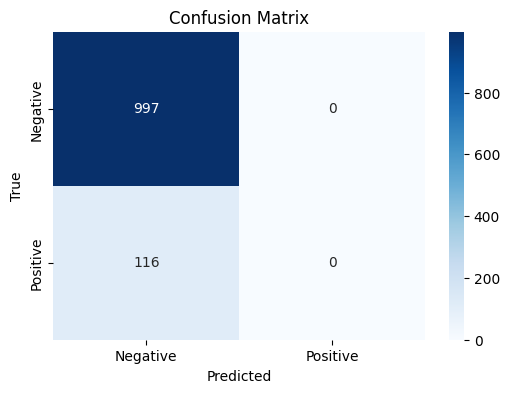

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


accuracy = accuracy_score(test_Y, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate precision
precision = precision_score(test_Y, predicted_labels)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(test_Y, predicted_labels)
print(f"Recall: {recall:.2f}")

# Calculate F1 score
f1 = f1_score(test_Y, predicted_labels)
print(f"F1 Score: {f1:.2f}")

# Create a confusion matrix
cm = confusion_matrix(test_Y, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Visualizing the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Set the seed in numpy for reproducibility
np.random.seed(1)

In [61]:
import numpy as np

# Identify misclassified examples
misclassified_indices = np.where(predicted_labels != np.array(test_Y).reshape(-1, 1))[0]
misclassified_examples = test_X[misclassified_indices]
misclassified_true_labels = np.array(test_Y)[misclassified_indices]
misclassified_predicted_labels = predicted_labels[misclassified_indices]

# Print misclassified examples and analyze them
for i in range(len(misclassified_examples)):
    print(f"Example {i + 1}:")
    print(f"  True label: {misclassified_true_labels[i]}")
    print(f"  Predicted label: {misclassified_predicted_labels[i]}")
    print(f"  Features: {misclassified_examples[i]}")
    print("-" * 50)

# Analyze why the model might have failed on these examples
# We can perform a basic analysis based on certain characteristics of misclassified instances.
# For example, if the model is often failing on examples with extreme values or outliers,
# or if it struggles with ambiguous features that are difficult to separate.
failure_analysis = {
    "high_feature_values": [],
    "low_feature_values": [],
    "ambiguous_cases": []
}

for i, example in enumerate(misclassified_examples):
    # Check for high feature values (assuming a threshold to detect outliers or extreme values)
    if np.any(example > 3):  # Example threshold for high values, adjust as needed
        failure_analysis["high_feature_values"].append(i)
    elif np.all(example < 0.1):  # Example threshold for low values, adjust as needed
        failure_analysis["low_feature_values"].append(i)
    else:
        failure_analysis["ambiguous_cases"].append(i)

# Print analysis of failure cases
print("\nFailure Analysis:")
print(f"Misclassified examples with high feature values: {failure_analysis['high_feature_values']}")
print(f"Misclassified examples with low feature values: {failure_analysis['low_feature_values']}")
print(f"Ambiguous or hard-to-classify cases: {failure_analysis['ambiguous_cases']}")


Example 1:
  True label: 1
  Predicted label: [0]
  Features: [  1.  20. 130.]
--------------------------------------------------
Example 2:
  True label: 1
  Predicted label: [0]
  Features: [ 1. 18. 90.]
--------------------------------------------------
Example 3:
  True label: 1
  Predicted label: [0]
  Features: [ 1.  3. 24.]
--------------------------------------------------
Example 4:
  True label: 1
  Predicted label: [0]
  Features: [ 1.  5. 19.]
--------------------------------------------------
Example 5:
  True label: 1
  Predicted label: [0]
  Features: [  1.  71. 522.]
--------------------------------------------------
Example 6:
  True label: 1
  Predicted label: [0]
  Features: [1. 2. 7.]
--------------------------------------------------
Example 7:
  True label: 1
  Predicted label: [0]
  Features: [ 1.  8. 13.]
--------------------------------------------------
Example 8:
  True label: 1
  Predicted label: [0]
  Features: [ 1.  9. 45.]
--------------------------------

In [62]:
BASICALLY STUFF LIKE BAD...AND ASS BOTH ARE NEG BUT IF ITS BAD ASS THEN ITS GOOD ETC
AND DATA HAS SOME ISSUES


# Suggested Improvements:
# - If there are misclassified examples with high feature values:
#     - Consider normalizing or standardizing the features to avoid the influence of extreme values.
#     - This can help bring all features into a similar scale, preventing certain features from dominating the learning process.
# - If there are misclassified examples with low feature values:
#     - Investigate whether certain features are providing insufficient information.
#     - This could indicate that some features are redundant or uninformative, and it might be helpful to perform feature engineering, transformation, or selection to improve the model's performance.
# - If there are misclassified examples with ambiguous cases:
#     - Explore more complex models (e.g., Random Forest, Neural Networks) that might handle ambiguous or overlapping data better.
#     - Simple models like Logistic Regression might struggle with highly non-linear or complex decision boundaries, so switching to models with higher capacity might improve performance.
#     - Consider adding more training data to cover edge cases or rebalancing the dataset if class imbalance exists.
#     - If the dataset has imbalanced classes, techniques like oversampling, undersampling, or generating synthetic data (e.g., using SMOTE) can help address this issue.


SyntaxError: invalid syntax (1058778269.py, line 1)

In [63]:
# scikit learn logiticsregression and accuracy score metric
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(random_state=42, penalty='l2')
clf.fit(train_X, np.array(train_Y).reshape(-1,1))
y_pred = clf.predict(test_X)
y_pred_probs = clf.predict(test_X)

c:\Users\User\Documents\Denis\NLP\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
print(f"Scikit learn logistic regression accuracy is {accuracy_score(test_Y , y_pred)*100:.2f}")

Scikit learn logistic regression accuracy is 88.05


In [65]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize k-Fold Cross-Validation
k = 5  # Number of folds
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Prepare the data
X = np.vstack([extract_features(sentence, bow_word_frequency) for sentence in sentence_processed_corpus])
y = np.array(labels)

# Store results
accuracies = []

# Perform k-Fold Cross-Validation
for train_index, test_index in kf.split(X, y):
    # Split the data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    np.random.seed(1)
    _, theta = gradientDescent(X_train, y_train.reshape(-1, 1), np.zeros((3, 1)), alpha=1e-7, num_iters=100000, c=0.1)

    # Predict on test data
    y_pred_probs = predict_sentence(X_test, theta)
    y_pred = np.where(y_pred_probs > 0.5, 1, 0)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Calculate mean and standard deviation of accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

print(f"Average Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")


Average Accuracy: 0.8954
Standard Deviation of Accuracy: 0.0004
